**IMPORT NECCESSARY LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Dataset**

In [4]:
df=pd.read_csv(r"C:\Users\fr2006tu\Downloads\housing_data.csv")

In [5]:
#head
df.head()
#first five rows 

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [6]:
#tail
df.tail()
#last five rows

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


## **Sanity Check of data**

In [8]:
#shape
df.shape
#1460 are rows and 1460 are columns

(1460, 81)

In [9]:
#info()
df.info()
#Numerical Columns	36 (int64 and float64)
#Categorical Columns 45 (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Detection and Handling of missing values**

In [11]:
#finding missing values
df.isna().sum().sort_values(ascending=False)
#4 columns has missing values Alley,MasVnrType,GarageYrBlt,Electrical        

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrArea         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df.drop(columns=["Alley"], inplace=True)    
#The column Alley was removed because over 93% of its values were missing.
#Imputation would introduce noise, and its absence has minimal impact on modeling house prices.

In [13]:
#filling missing values in numerical column with median 
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())


In [14]:
#filling missing values in categorical columns with the most frequent (mode) value.
for col in df.select_dtypes(include='object').columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
#again checking for missing values
df.isna().sum().sort_values(ascending=False)
#no missing values 

Unnamed: 0     0
MSSubClass     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

In [16]:
#delete unwanted columns
df.drop(columns=["Unnamed: 0"], inplace=True)    

In [17]:
df.shape
#one column has been removed 
#1460 rows 
#80 columns

(1460, 79)

In [18]:
#finding duplicates
df.duplicated().sum()
#no duplicates

0

In [19]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


### **Outliers**

In [21]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

print("Outliers Count Per Column:\n")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

 
#Outliers were detected in several numerical columns using the IQR method. 
#Features like 'EnclosedPorch', 'BsmtFinSF2', and 'OverallCond' showed the highest number of outliers 
#which may influence model performance if left untreated.

Outliers Count Per Column:

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
MasVnrArea        98
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
SalePrice         61
TotalBsmtSF       61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
LotFrontage       16
BsmtFinSF1         7
YearBuilt          7
PoolArea           7
GarageCars         5
Fireplaces         5
2ndFlrSF           2
OverallQual        2
BsmtFullBath       1
GarageYrBlt        1
dtype: int64


In [22]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < LB, LB, df[col])
    df[col] = np.where(df[col] > UB, UB, df[col])


#Outliers in all numerical columns were capped using the IQR method,
#ensuring that extreme values do not distort the analysis while preserving all rows in the dataset.

In [23]:
#again checking for outliers
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

print(" Outliers count per column after capping:\n")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

#outliers has been resolved


 Outliers count per column after capping:

Series([], dtype: int64)


## Univariate Analysis

##### Analyzing the distribution and central tendencies of individual variables.

#### **Distribution of Sale Price**

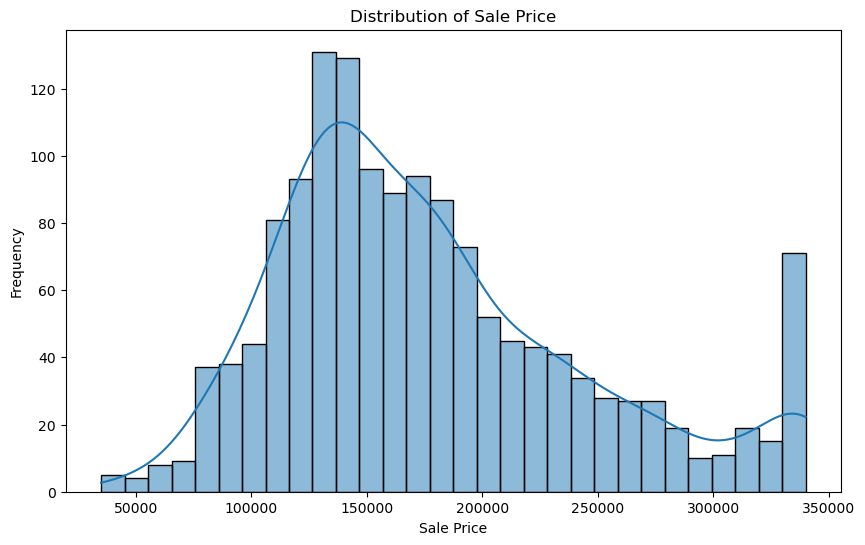

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

#conclusions :Most houses are priced between $100,000 and $200,000. Prices above $400,000 are rare, showing a right-skewed distribution.

### Lot Area Distribution

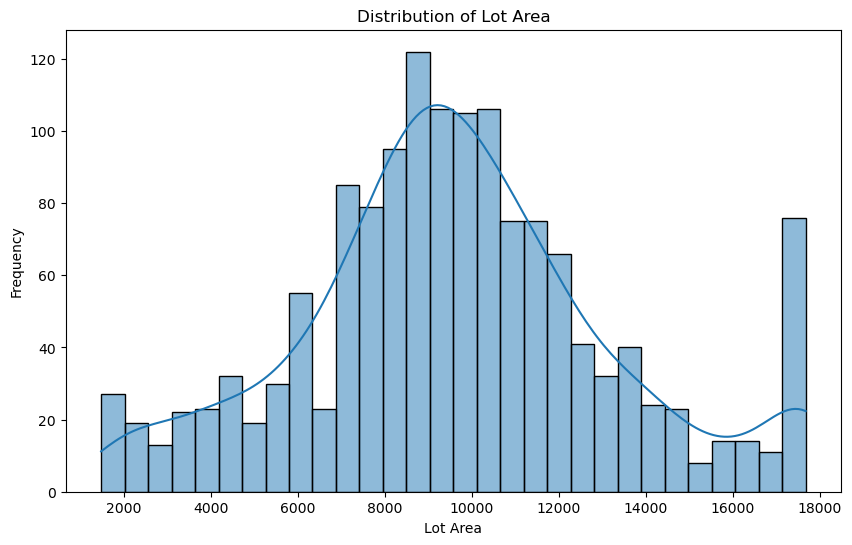

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df["LotArea"], kde=True, bins=30)
plt.title("Distribution of Lot Area")
plt.xlabel("Lot Area")
plt.ylabel("Frequency")
plt.show()

# Most properties have a lot area less than 20,000 sq ft, though a few outliers are significantly larger.

### Zoning Type Counts (MSZoning)

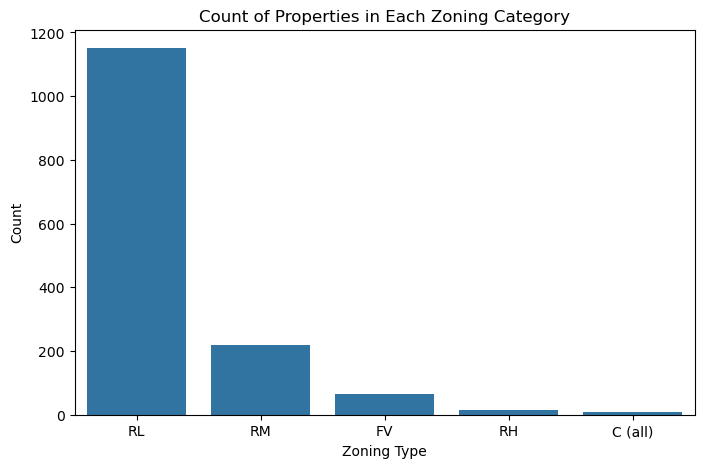

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="MSZoning", order=df["MSZoning"].value_counts().index)
plt.title("Count of Properties in Each Zoning Category")
plt.xlabel("Zoning Type")
plt.ylabel("Count")
plt.show()

#Conclusion: Most properties fall under the RL (Residential Low Density) zoning category.

### Overall Quality Ratings

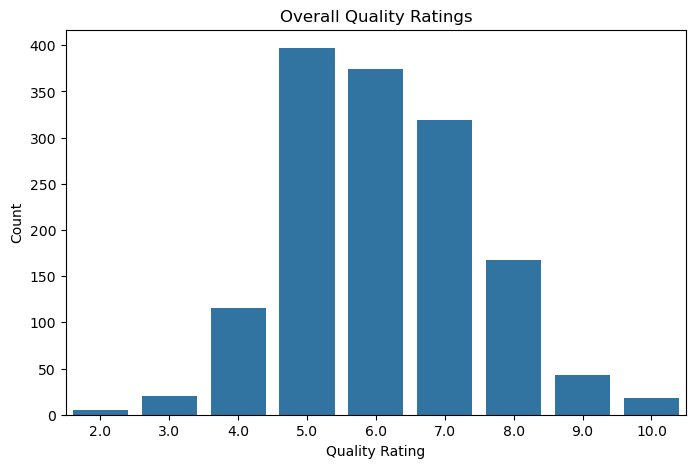

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x="OverallQual", data=df)
plt.title("Overall Quality Ratings")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.show()

#Majority of houses are rated between 5 to 7, indicating average to above-average quality.

### Distribution of Year Built

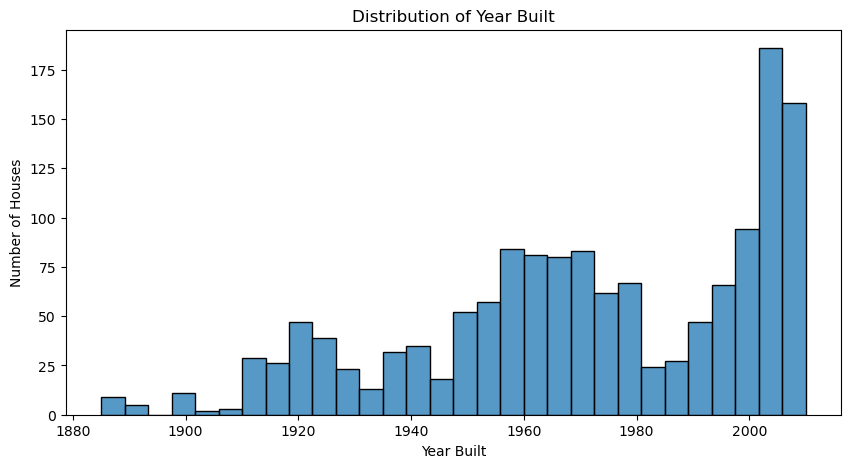

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df["YearBuilt"], bins=30, kde=False)
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Number of Houses")
plt.show()

#Conclusion: Most houses were built after 1950, with a significant rise around the 2000s.

### Above Ground Living Area (GrLivArea)

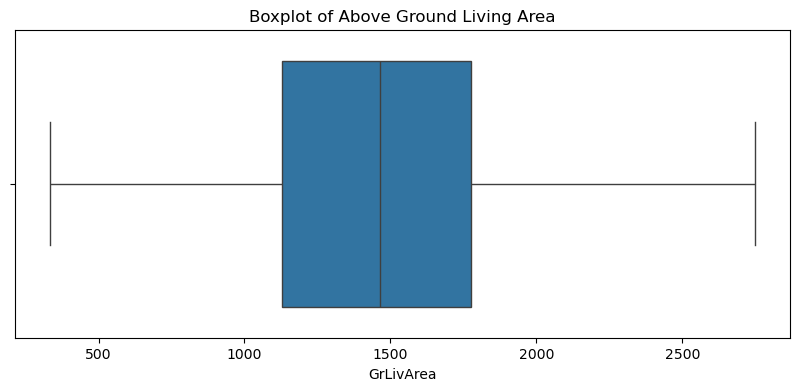

In [37]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["GrLivArea"])
plt.title("Boxplot of Above Ground Living Area")
plt.xlabel("GrLivArea")
plt.show()

#Conclusion: Most homes have 1000–2000 sq ft living area above ground. Some extreme outliers exist beyond 4000 sq ft.

### House Style Distribution

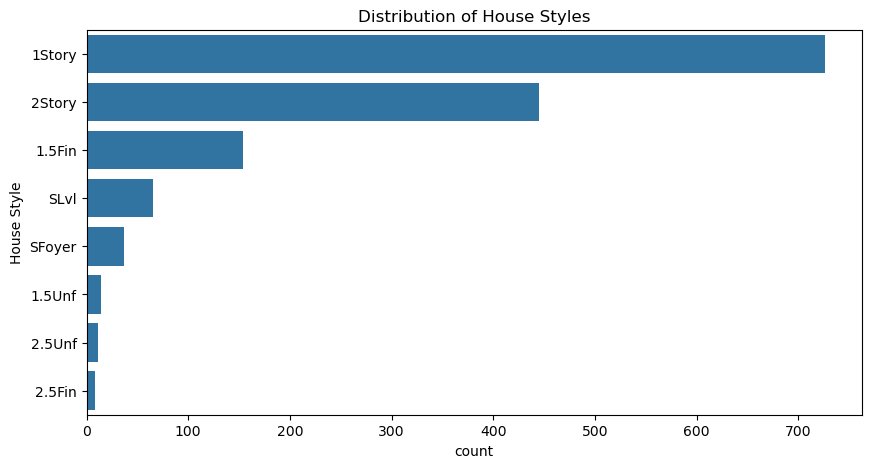

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(y="HouseStyle", data=df, order=df["HouseStyle"].value_counts().index)
plt.title("Distribution of House Styles")
plt.xlabel("count")
plt.ylabel("House Style")
plt.show()

#Conclusion: The 1Story house style is the most common, followed by 2Story.

### Garage Capacity (GarageCars)

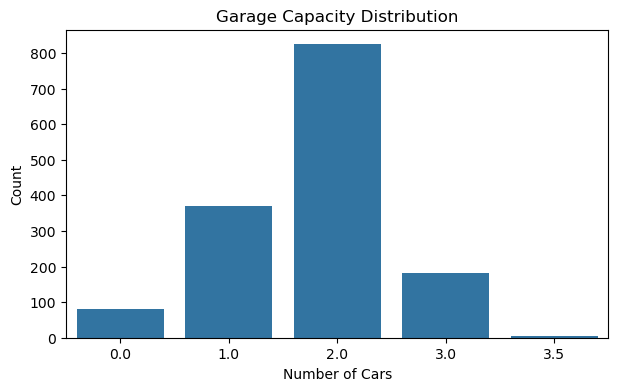

In [41]:
plt.figure(figsize=(7, 4))
sns.countplot(x="GarageCars", data=df)
plt.title("Garage Capacity Distribution")
plt.xlabel("Number of Cars")
plt.ylabel("Count")
plt.show()

#Conclusion: Most homes have garage space for 2 cars, followed by 1-car garages.

### Number of Fireplaces

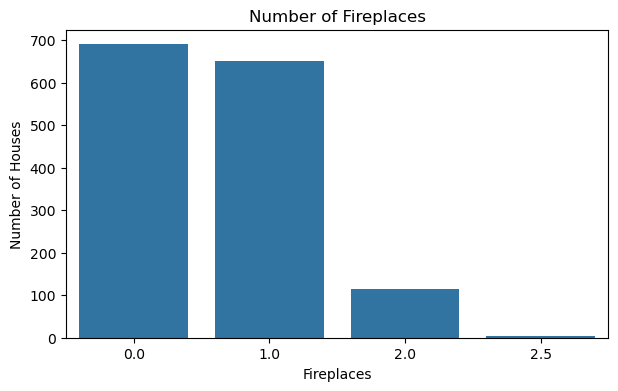

In [43]:
plt.figure(figsize=(7, 4))
sns.countplot(x="Fireplaces", data=df)
plt.title("Number of Fireplaces")
plt.xlabel("Fireplaces")
plt.ylabel("Number of Houses")
plt.show()

#Conclusion: Majority of houses have 0 or 1 fireplace.

### Kitchen Quality

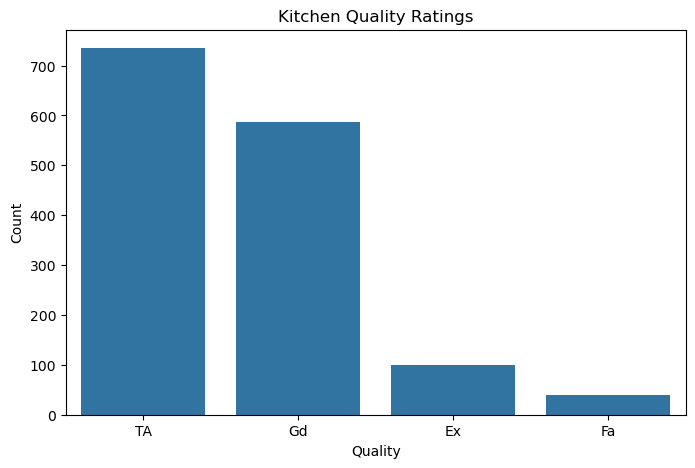

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x="KitchenQual", data=df, order=df["KitchenQual"].value_counts().index)
plt.title("Kitchen Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

#Conclusion: Most kitchens are rated Good (Gd) or Typical/Average (TA).

### Basement Full Bathrooms

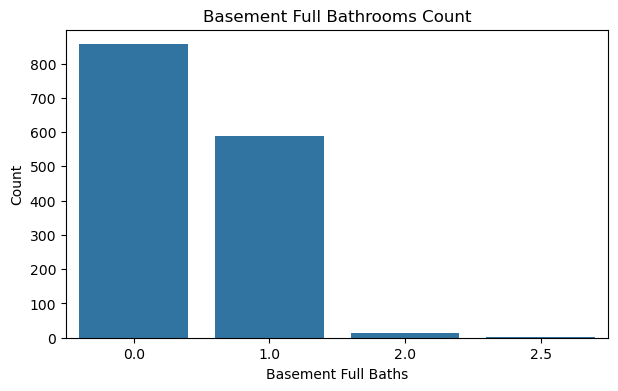

In [47]:
plt.figure(figsize=(7, 4))
sns.countplot(x="BsmtFullBath", data=df)
plt.title("Basement Full Bathrooms Count")
plt.xlabel("Basement Full Baths")
plt.ylabel("Count")
plt.show()

#Conclusion: Most homes do not have full bathrooms in the basement, or have just one.

### Air conditioner counts

<function matplotlib.pyplot.show(close=None, block=None)>

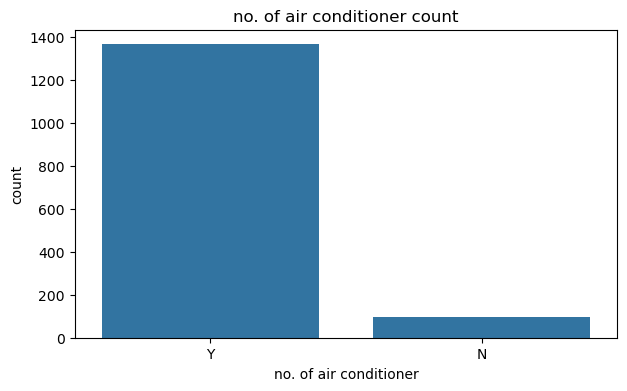

In [49]:
plt.figure(figsize=(7,4))
sns.countplot(x="CentralAir", data=df)
plt.title("no. of air conditioner count")
plt.xlabel("no. of air conditioner")
plt.ylabel("count")
plt.show

#conclusion most of the houses have air contioner 

## **Bivariant Analysis**

##### analyzing the relationship between two variables, such as how different features influence SalePrice.

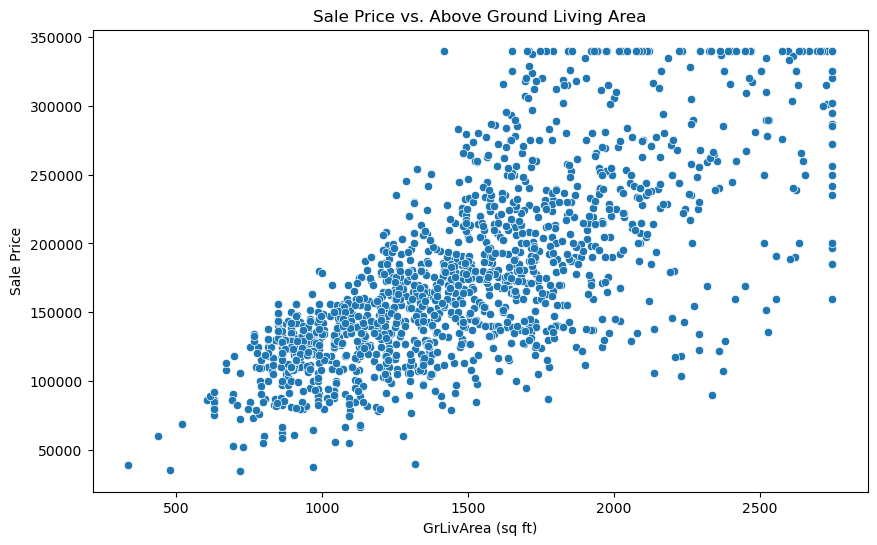

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Sale Price vs. Above Ground Living Area")
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: There is a strong positive correlation – bigger houses generally sell for more. Some outliers have high area but relatively low prices.

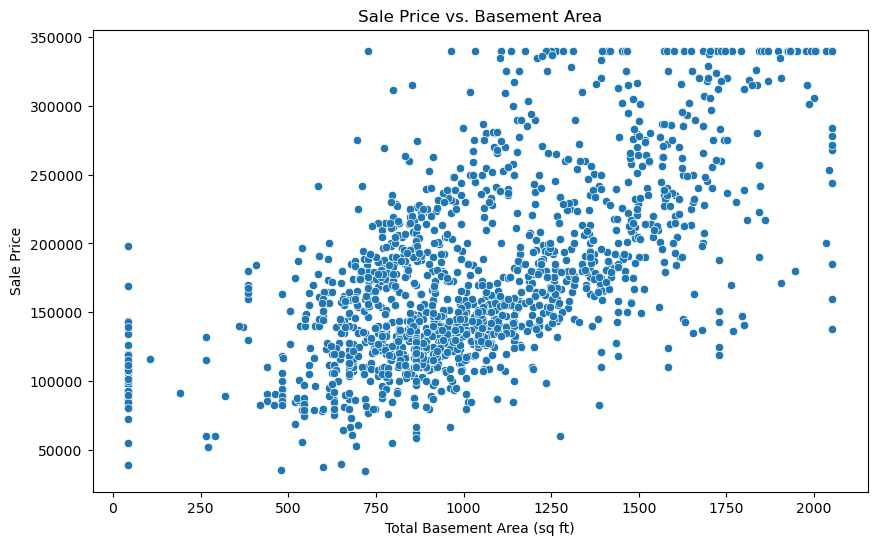

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.title("Sale Price vs. Basement Area")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Houses with larger basements tend to have higher sale prices, though the effect is less strong than living area.

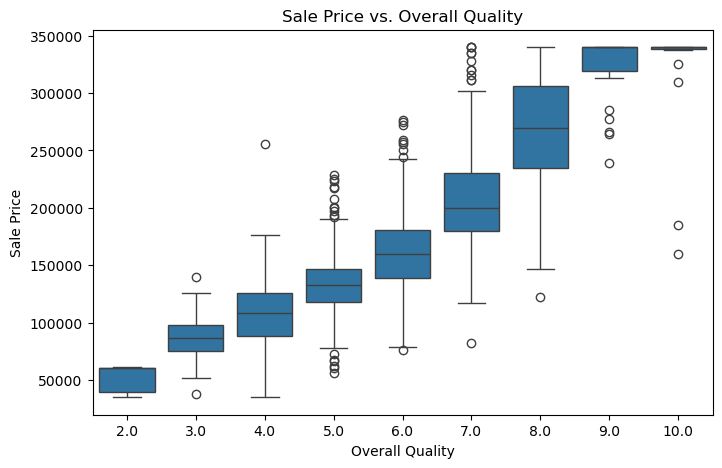

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Sale Price vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Houses with higher quality ratings clearly fetch higher prices. The trend is very visible.

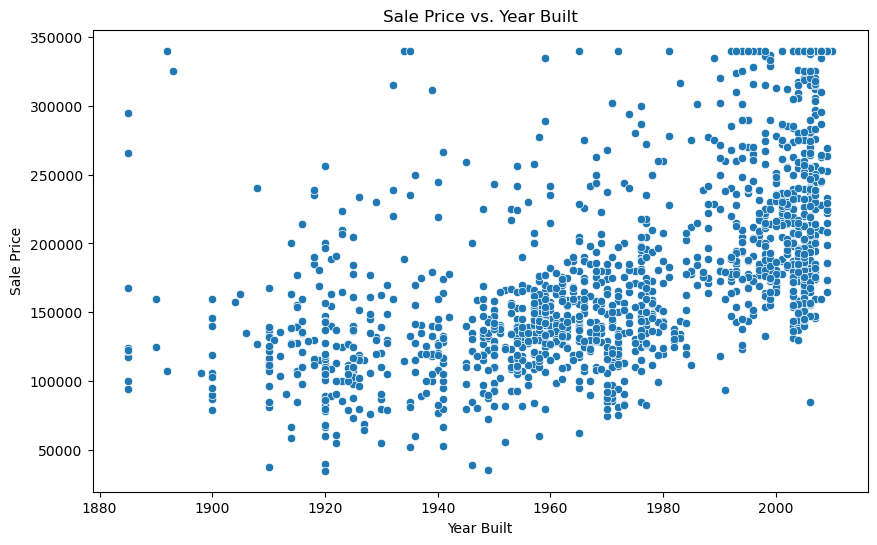

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="YearBuilt", y="SalePrice", data=df)
plt.title("Sale Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Newer houses tend to have higher sale prices, although there's some spread.

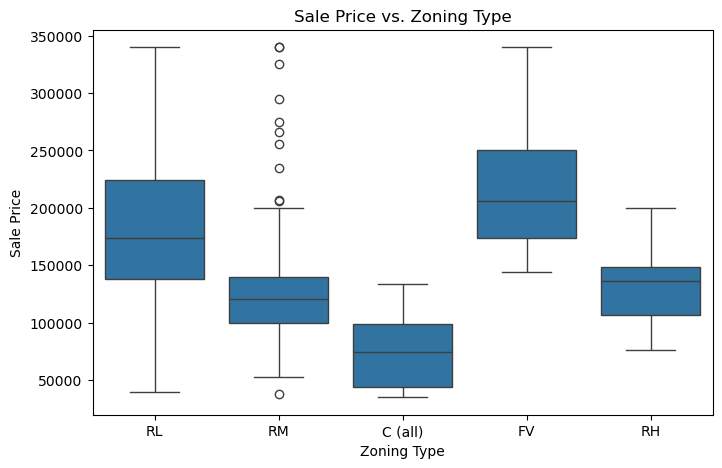

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="MSZoning", y="SalePrice", data=df)
plt.title("Sale Price vs. Zoning Type")
plt.xlabel("Zoning Type")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Houses in RL (Residential Low Density) zones generally sell for more than others.

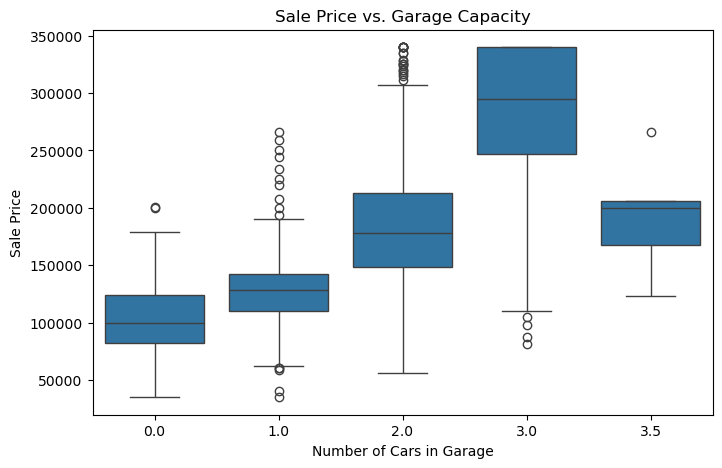

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="GarageCars", y="SalePrice", data=df)
plt.title("Sale Price vs. Garage Capacity")
plt.xlabel("Number of Cars in Garage")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Houses with 2 or more garage spaces typically fetch higher prices.

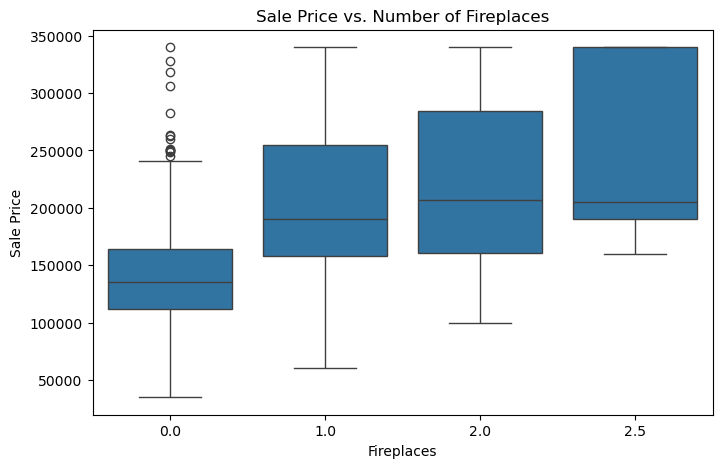

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fireplaces", y="SalePrice", data=df)
plt.title("Sale Price vs. Number of Fireplaces")
plt.xlabel("Fireplaces")
plt.ylabel("Sale Price")
plt.show()

#Conclusion: Having 1 or more fireplaces is associated with a higher sale price.

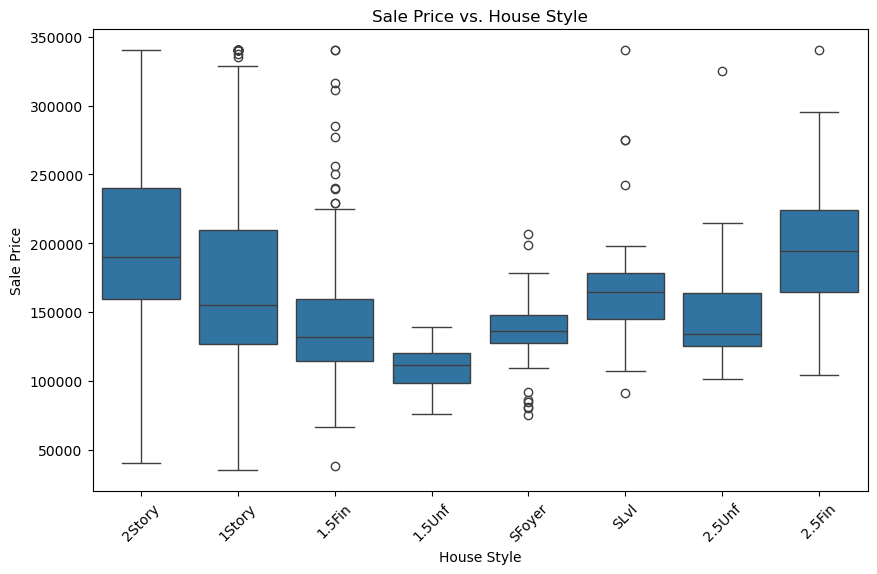

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="HouseStyle", y="SalePrice", data=df)
plt.title("Sale Price vs. House Style")
plt.xlabel("House Style")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.show()

#Conclusion: 2Story and 1.5Fin styles tend to fetch higher prices than others.

## **Multivarient**

##### exploring relationships between three or more variables to see how multiple factors together influence SalePrice.

#### Scatter plot 

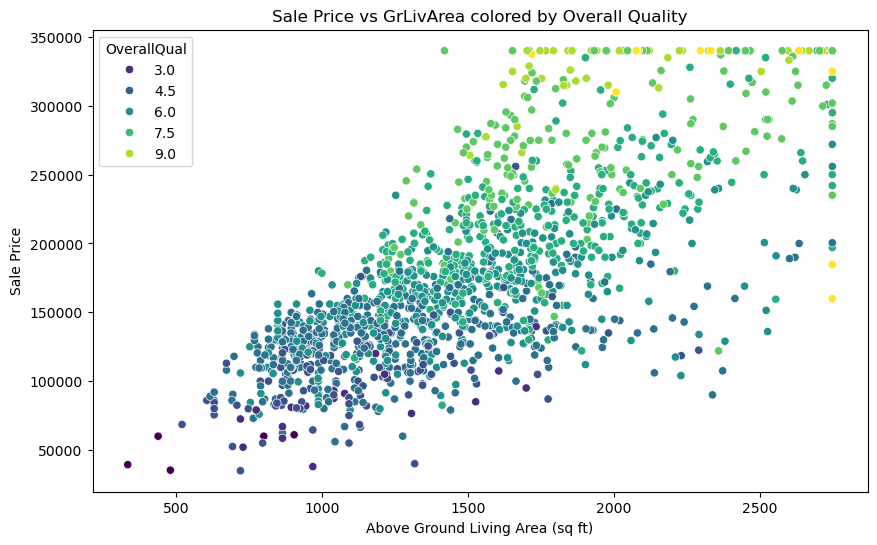

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue="OverallQual", palette="viridis")
plt.title("Sale Price vs GrLivArea colored by Overall Quality")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

#Insight: Larger homes with higher quality ratings tend to have higher prices.

#### Pairplot

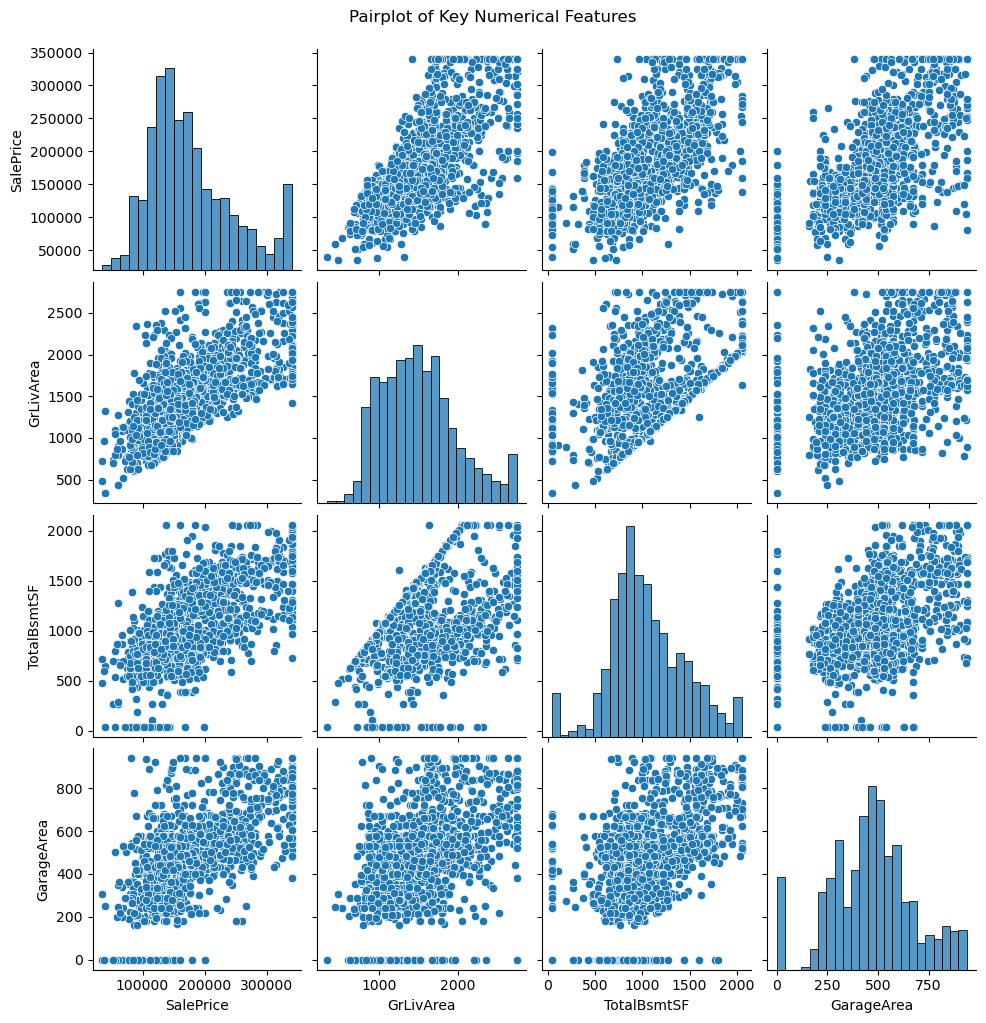

In [65]:
sns.pairplot(df[["SalePrice", "GrLivArea", "TotalBsmtSF", "GarageArea"]])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

#Insight: Helps visualize correlations — e.g., GrLivArea vs SalePrice shows a clear upward trend.

#### Heatmap

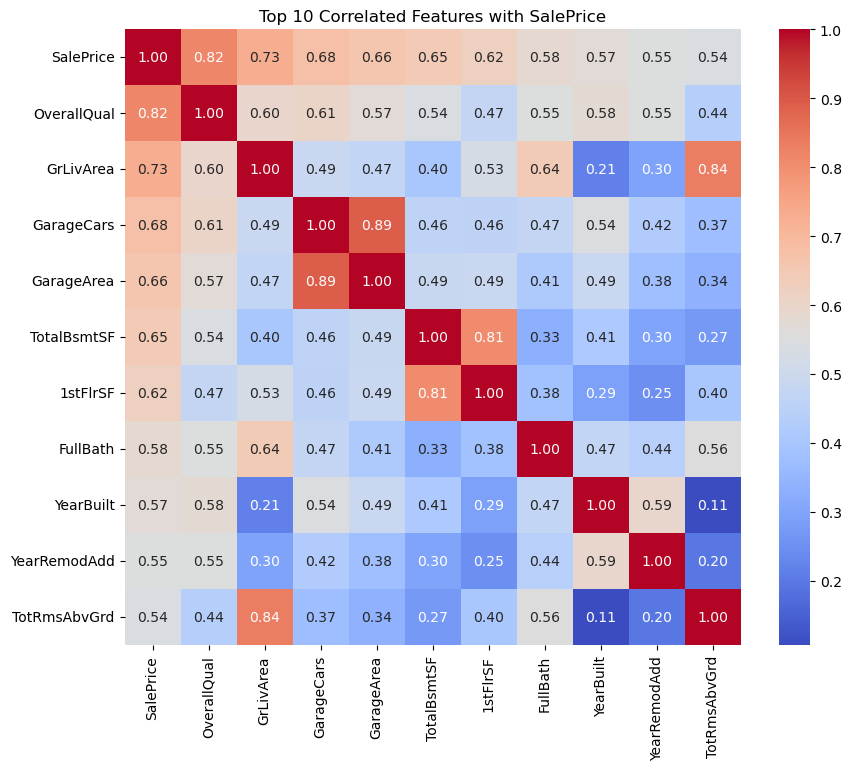

In [67]:
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(11).index  # includes SalePrice + top 10

top_corr_matrix = df[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Top 10 Correlated Features with SalePrice")
plt.show()


#Structural quality (OverallQual, Garage, TotalBsmtSF) and size (GrLivArea, 1stFlrSF) are the main drivers of price.
#Modern features (recent remodeling, newer builds, more bathrooms) are valuable.
#Garage capacity (GarageCars) has a higher correlation than total garage area — meaning practicality matters more than just size.

## **Feature engineering**

In [69]:
#Newer houses tend to be priced higher. This gives a more intuitive sense of how old the property is.
df["PropertyAge"] = 2025 - df["YearBuilt"]

In [70]:
#Shows whether the house has been remodeled — a binary feature that can be very useful.
df["IsRemodeled"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype(int)

In [71]:
df["TotalRooms"] = df["TotRmsAbvGrd"] + df["KitchenAbvGr"]
#Gives a more complete picture of how many functional rooms exist.

In [72]:
df["TotalBathrooms"] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])
#Bathrooms strongly influence home prices; this feature combines them all for better impact.

In [73]:
df.shape
#four colums have been added propertyAge,IsRemodeled,Totalrooms
#1460 rows
#83 columns

(1460, 83)

In [74]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [75]:
#dropping condtion2
df.drop(columns=["Condition2"], inplace=True)
#Condition2 was dropped because it is nearly always identical to Condition1, representing a rare secondary condition that occurs in very few records.
#This column adds no unique value and introduces redundancy, which can lead to unnecessary complexity in modeling.

In [76]:
df.shape
#column condition2 is dropped 
#rows 1460
#columns 82


(1460, 82)

#### Feature Engineering and Size Impact

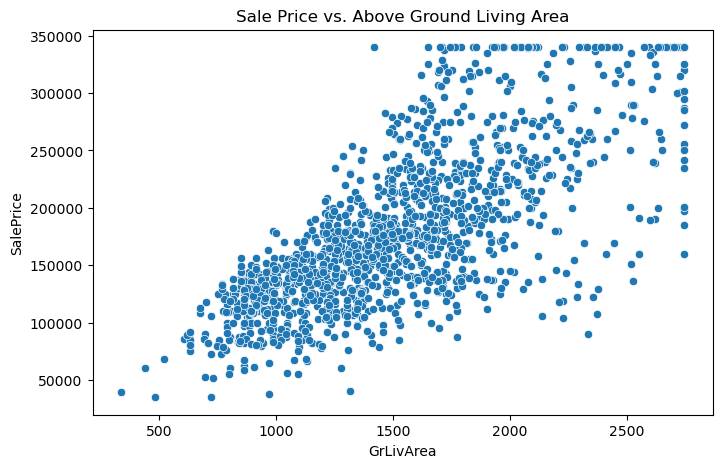

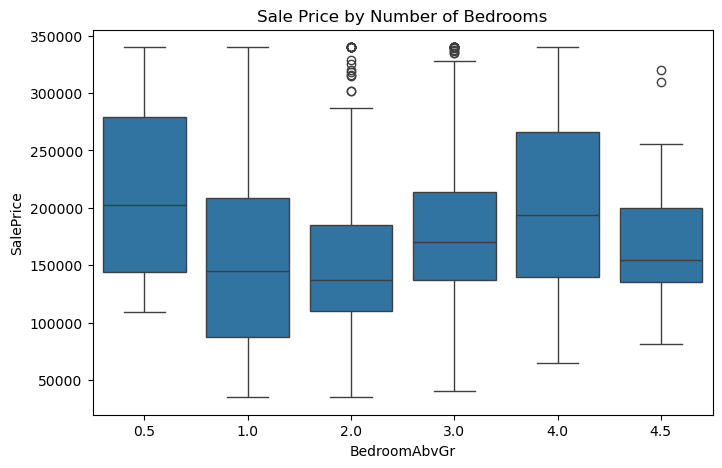

In [78]:
df["TotalRooms"] = df["TotRmsAbvGrd"] + df["KitchenAbvGr"]
df["PropertyAge"] = 2025 - df["YearBuilt"]  # You already did this earlier

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Sale Price vs. Above Ground Living Area")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)
plt.title("Sale Price by Number of Bedrooms")
plt.show()



#- Larger homes (measured by `GrLivArea` and `TotalRooms`) tend to have higher sale prices.
#- Recently built homes (lower `PropertyAge`) are also generally priced higher.
#- Size-related features play a key role in influencing house prices.



#### Market Trends and Historical Pricing

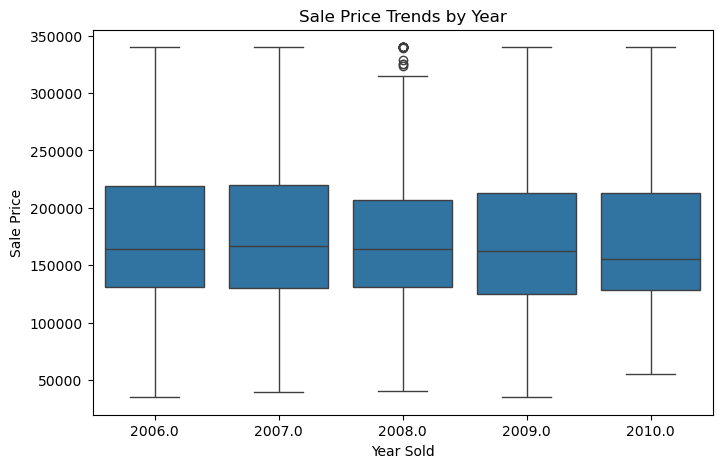

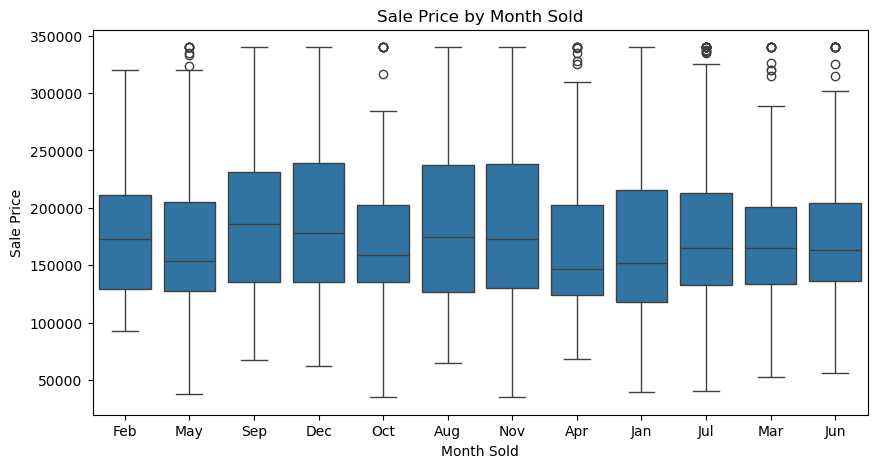

In [80]:
df["MoSold"] = df["MoSold"].astype(str)

plt.figure(figsize=(8, 5))
sns.boxplot(x="YrSold", y="SalePrice", data=df)
plt.title("Sale Price Trends by Year")
plt.xlabel("Year Sold")
plt.ylabel("Sale Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="MoSold", y="SalePrice", data=df)
plt.title("Sale Price by Month Sold")
plt.xlabel("Month Sold")
plt.ylabel("Sale Price")
plt.show()



#- Sale prices remained relatively stable across different years.
#- Minor seasonal variation was observed based on the month of sale, with some months (like June and July) showing slightly higher prices.
#- Temporal analysis indicates that market timing has limited but observable influence on pricing.


#### Customer Preferences and Amenities

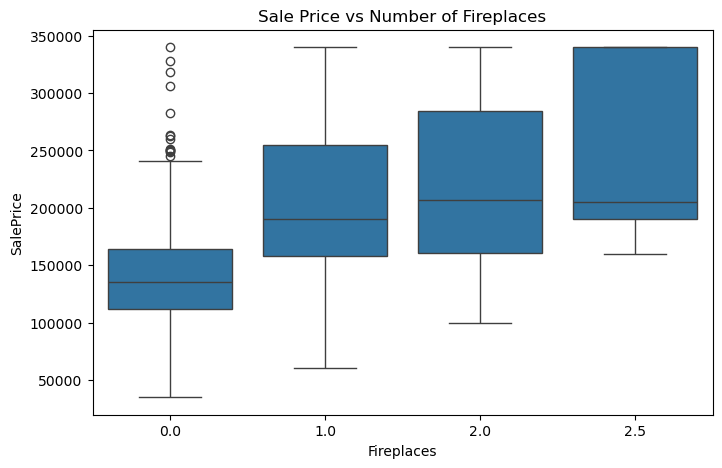

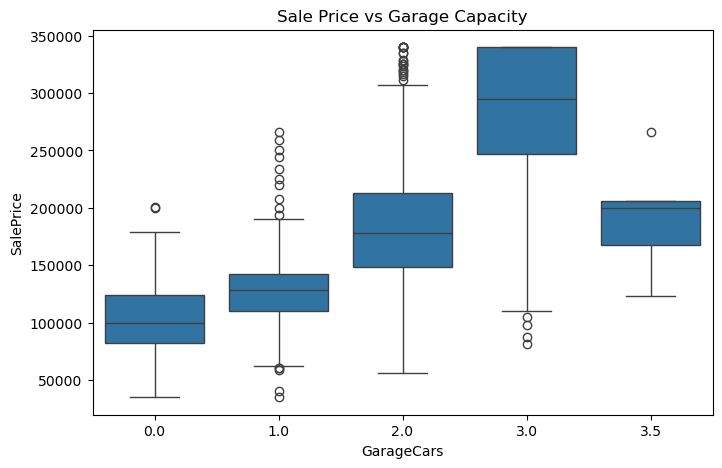

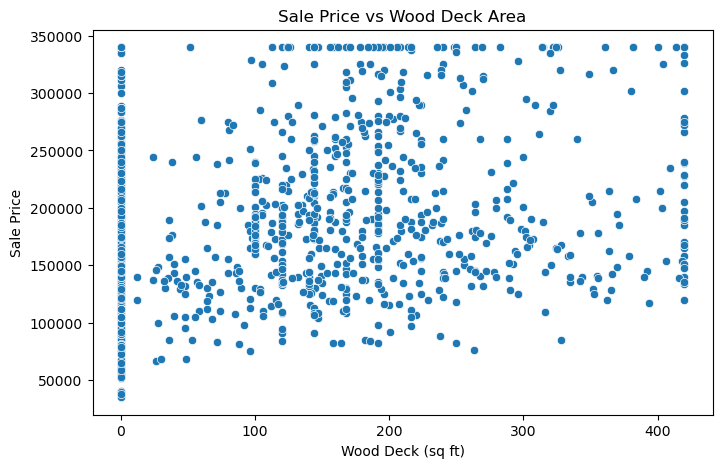

In [82]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fireplaces", y="SalePrice", data=df)
plt.title("Sale Price vs Number of Fireplaces")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="GarageCars", y="SalePrice", data=df)
plt.title("Sale Price vs Garage Capacity")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x="WoodDeckSF", y="SalePrice", data=df)
plt.title("Sale Price vs Wood Deck Area")
plt.xlabel("Wood Deck (sq ft)")
plt.ylabel("Sale Price")
plt.show()






#- Houses equipped with more fireplaces, garage capacity, and porch space tend to have higher sale prices.  
#- Features like 'GarageCars' and 'Fireplaces' are strong indicators of **buyer preference and perceived comfort.  
#- Such amenities not only add functional value but also play a key role in influencing purchasing decisions, ultimately driving up property value.

